In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina' 

In [3]:
df_cars=pd.read_csv('cars.csv')
print(df_cars.head())
print(df_cars.shape)
print(len(df_cars))#the first dimension of shape/row number
print(df_cars.describe())

    MPG  CYL    ENG   WGT
0  18.0    8  307.0  3504
1  15.0    8  350.0  3693
2  18.0    8  318.0  3436
3  16.0    8  304.0  3433
4  17.0    8  302.0  3449
(392, 4)
392
              MPG         CYL         ENG          WGT
count  392.000000  392.000000  392.000000   392.000000
mean    23.445918    5.471939  194.411990  2977.584184
std      7.805007    1.705783  104.644004   849.402560
min      9.000000    3.000000   68.000000  1613.000000
25%     17.000000    4.000000  105.000000  2225.250000
50%     22.750000    4.000000  151.000000  2803.500000
75%     29.000000    8.000000  275.750000  3614.750000
max     46.599998    8.000000  455.000000  5140.000000


In [4]:
cylsort=sorted(df_cars['CYL'].unique()) #find the category of cyl

In [5]:
cylcount=pd.crosstab(index=df_cars['CYL'],columns='count')
print(cylcount)
cylcount2=df_cars.groupby('CYL').count()
print(cylcount2)

col_0  count
CYL         
3          4
4        199
5          3
6         83
8        103
     MPG  ENG  WGT
CYL               
3      4    4    4
4    199  199  199
5      3    3    3
6     83   83   83
8    103  103  103


In [6]:
avg_mpg=df_cars.groupby('CYL').mean()['MPG']
print(avg_mpg)
avg_wgt=df_cars.groupby('CYL').mean()['WGT']
print(avg_wgt)

CYL
3    20.550000
4    29.283920
5    27.366667
6    19.973494
8    14.963107
Name: MPG, dtype: float64
CYL
3    2398.500000
4    2305.110553
5    3103.333333
6    3202.120482
8    4114.718447
Name: WGT, dtype: float64


In [7]:
#get the list for specific wheel rows
cyl4=df_cars[df_cars['CYL']==4]['MPG'].values
cyl6 = df_cars[df_cars['CYL']==6]['MPG'].values
cyl8 = df_cars[df_cars['CYL']==8]['MPG'].values

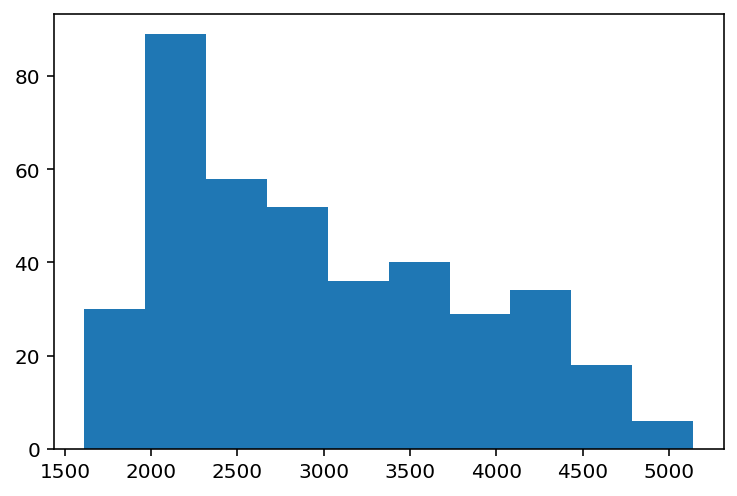

In [8]:
#matplot
#define fig ax
fig,ax=plt.subplots(figsize=(6,4))
ax.hist(df_cars['WGT'])
plt.show()

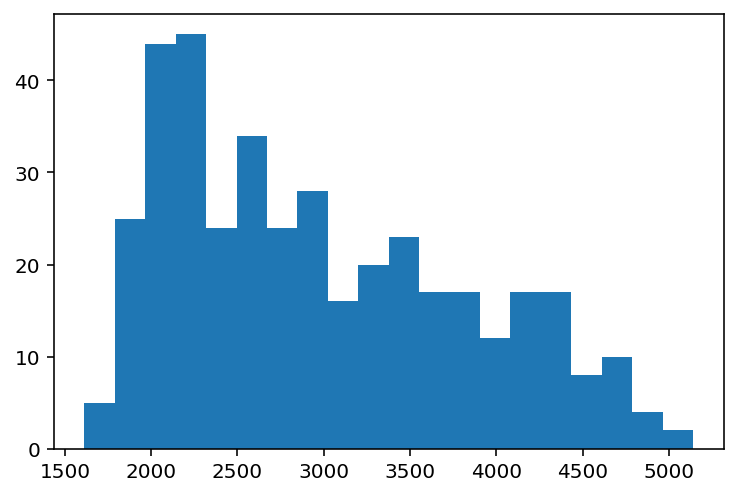

In [9]:
#add more bins
fig,ax=plt.subplots(figsize=(6,4))
ax.hist(df_cars['WGT'],bins=20)
plt.show()

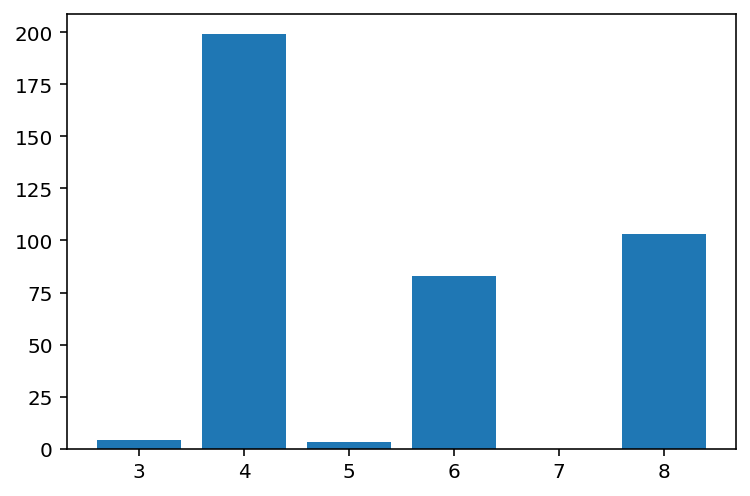

In [12]:
x=cylsort
y=cylcount['count']

fig,ax=plt.subplots(figsize=(6,4))
ax.bar(x,y)
plt.show()

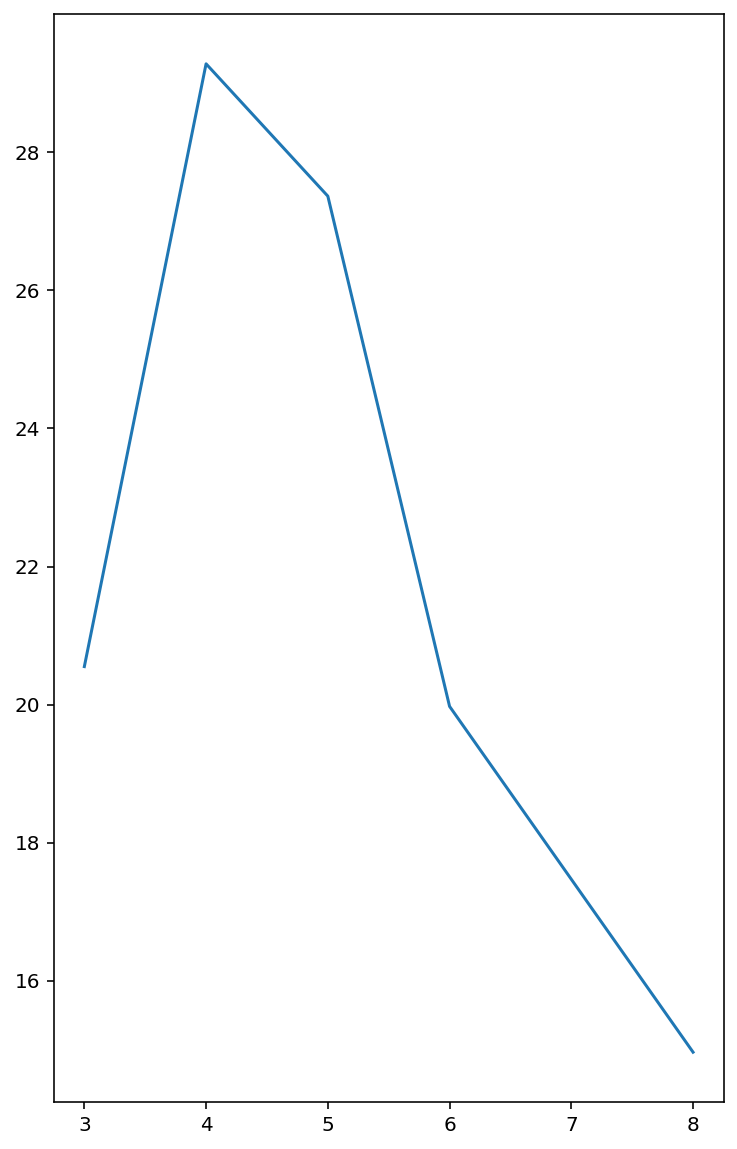

In [13]:
fig,ax=plt.subplots(figsize=(6,10))
ax.plot(avg_mpg)
plt.show()

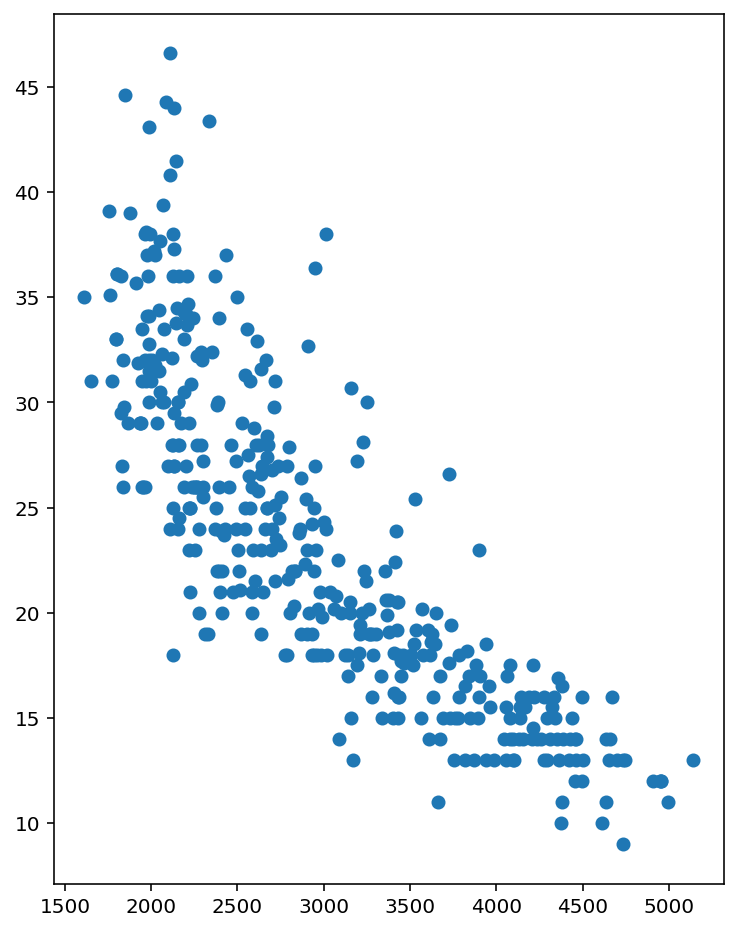

In [15]:
fig,ax=plt.subplots(figsize=(6,8))
ax.scatter(df_cars['WGT'],df_cars['MPG'])
plt.show()

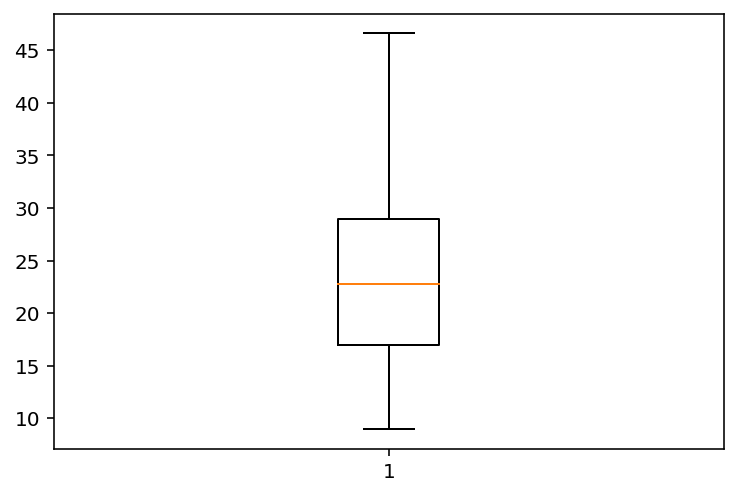

In [16]:
fig,ax=plt.subplots(figsize=(6,4))
ax.boxplot(df_cars['MPG'])
plt.show()

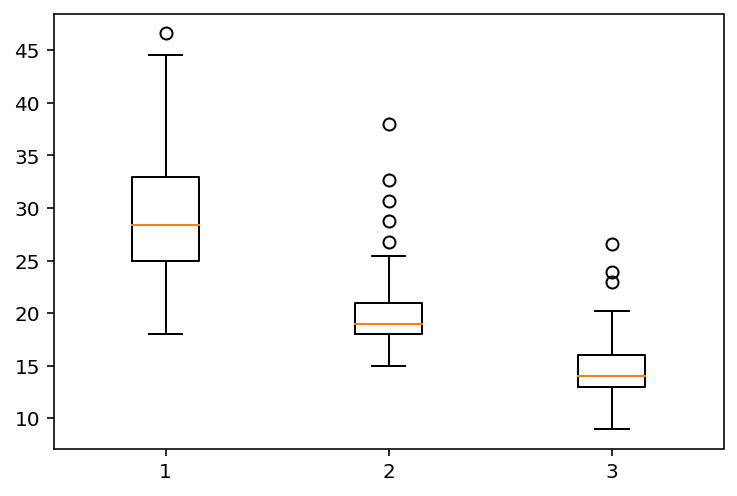

In [17]:
data=[cyl4,cyl6,cyl8]

fig,ax=plt.subplots(figsize=(6,4))
ax.boxplot(data)
plt.show()

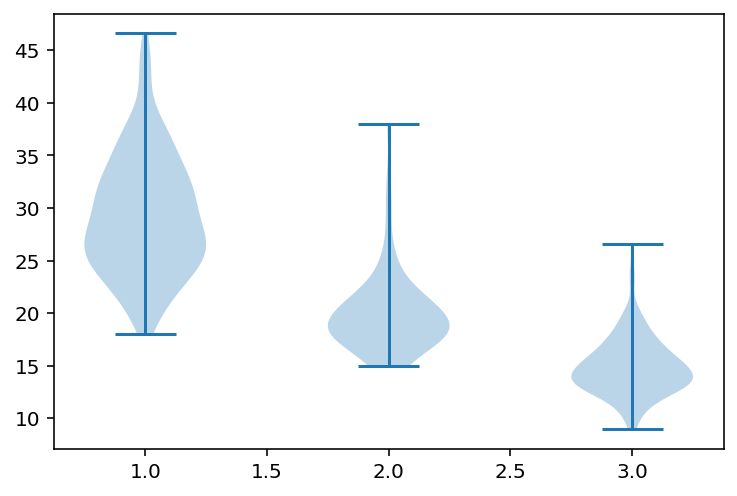

In [18]:
fig,ax=plt.subplots(figsize=(6,4))
ax.violinplot(data)
plt.show()

In [19]:
c=df_cars.corr()
print(c)

          MPG       CYL       ENG       WGT
MPG  1.000000 -0.777618 -0.805127 -0.832244
CYL -0.777618  1.000000  0.950823  0.897527
ENG -0.805127  0.950823  1.000000  0.932994
WGT -0.832244  0.897527  0.932994  1.000000


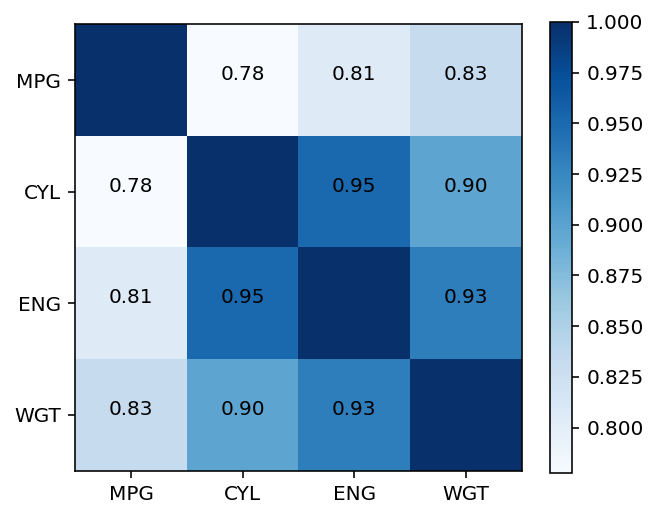

In [25]:
fig,ax=plt.subplots(figsize=(5,5))
c=np.abs(c)
im=ax.imshow(c,cmap='Blues')
for i in range(4):
    for j in range(4):
        if i!=j:
            ax.text(i,j,f"{c.iloc[i,j]:.2f}", horizontalalignment='center')

ax.set_xticks(range(4))
ax.set_yticks(range(4))
ax.set_xticklabels(list(c.columns))
ax.set_yticklabels(list(c.columns))

fig.colorbar(im, ax=ax, shrink=.83) #add color bar to indicate value-color map
plt.show()

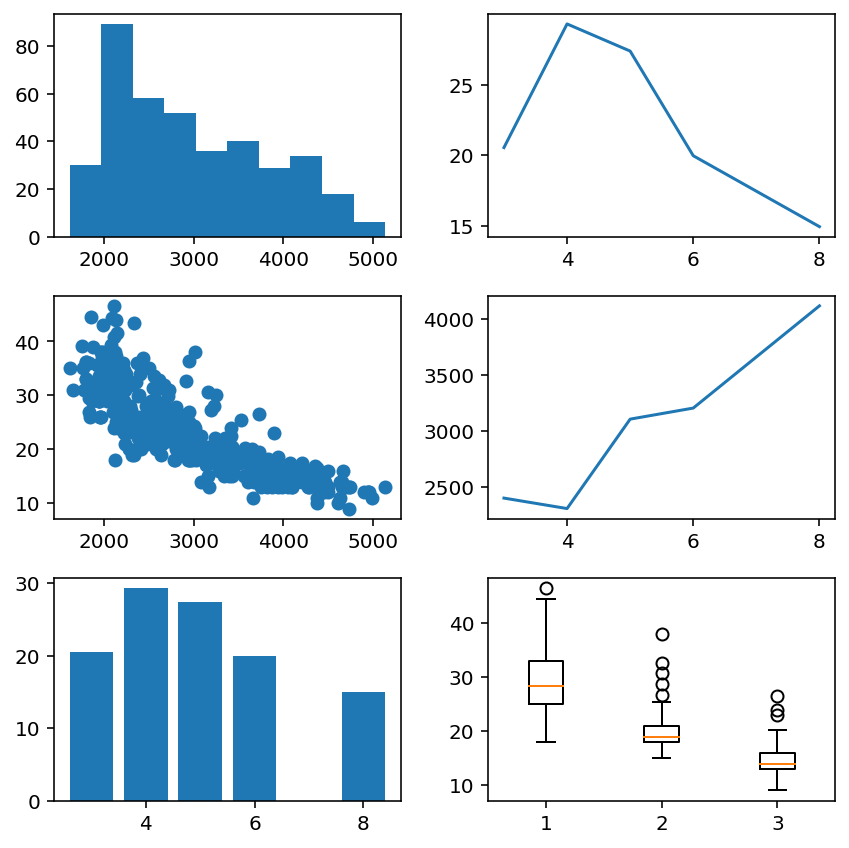

In [29]:
#create many subplots in one fig

fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(6,6))

axes[0][0].hist(df_cars['WGT'])
axes[0][1].plot(cylsort, avg_mpg)
axes[1][0].scatter(df_cars['WGT'], df_cars['MPG'])
axes[1][1].plot(avg_wgt)
axes[2][0].bar(cylsort, avg_mpg)
axes[2][1].boxplot([cyl4,cyl6,cyl8])

plt.tight_layout() # I add this anytime I have a grid as it prevents plots overlapping
plt.show()



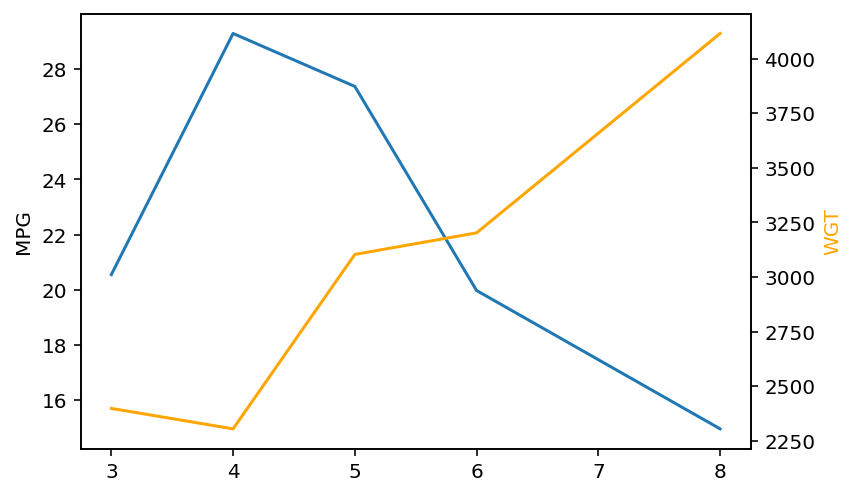

In [31]:
fig,ax=plt.subplots(figsize=(6,4))
ax2=ax.twinx()

ax.plot(cylsort,avg_mpg)
ax2.plot(cylsort,avg_wgt,c='orange')

ax.set_ylabel('MPG')
ax2.set_ylabel('WGT',c='orange')

plt.show()